In [1]:
import pandas as pd

# Read the CSV file with a comma delimiter
df = pd.read_csv('/content/Iris.csv', sep=',')

# cetak header data (5 baris data) dari file
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn.preprocessing import StandardScaler

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Species']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# print head
df_standar = pd.DataFrame(x, columns=features)
df_standar.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


<Axes: >

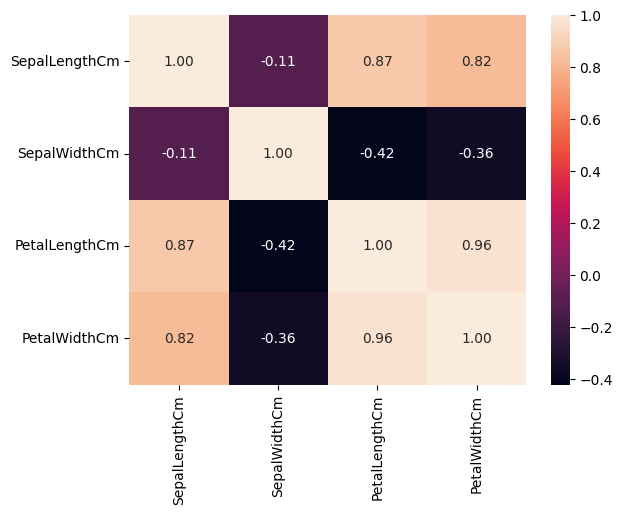

In [3]:
import seaborn as sns
sns.heatmap(df_standar.corr(),
            annot=True, fmt=".2f")

In [4]:
from sklearn.decomposition import PCA
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = 3)
pca.fit(df_standar)
data_pca = pca.transform(df_standar)
data_pca = pd.DataFrame(data_pca,columns=['PC1', 'PC2', 'PC3'])
data_pca.head()

,PC1,PC2,PC3
0,-2.264542,0.505704,0.121943
1,-2.086426,-0.655405,0.227251
2,-2.367950,-0.318477,-0.051480
3,-2.304197,-0.575368,-0.098860
4,-2.388777,0.674767,-0.021428


<Axes: >

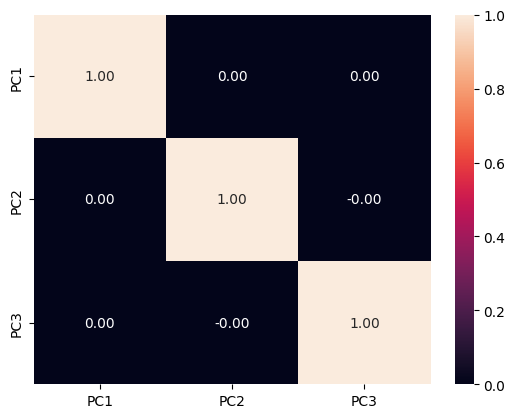

In [5]:
## cek heatmap kembali untuk fitur PCA
sns.heatmap(data_pca.corr(),
            annot=True, fmt=".2f")

NameError: name 'finalDf' is not defined

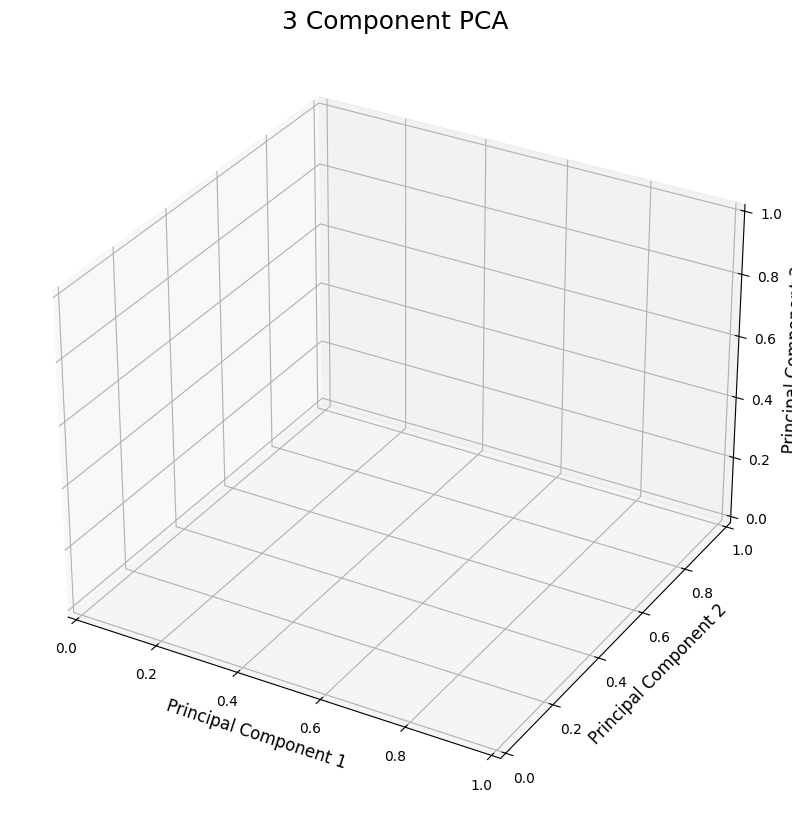

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Asumsi 'finalDf' sudah didefinisikan dengan kolom 'PC1', 'PC2', 'PC3', dan 'Species'
# Anda mungkin perlu menggabungkan 'data_pca' dengan kolom 'Species' dari DataFrame asli Anda.
# Contoh: finalDf = pd.concat([data_pca, df[['Species']]], axis = 1)

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3 Component PCA', fontsize=18)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

# Pastikan 'finalDf' didefinisikan sebelum menjalankan bagian ini
# Baris di bawah ini adalah bagian dari script yang Anda berikan
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'],
               finalDf.loc[indicesToKeep, 'PC2'],
               finalDf.loc[indicesToKeep, 'PC3'],
               c=color,
               s=50,
               label=target
    )

ax.legend()
plt.show()

[0.72770452 0.23030523]


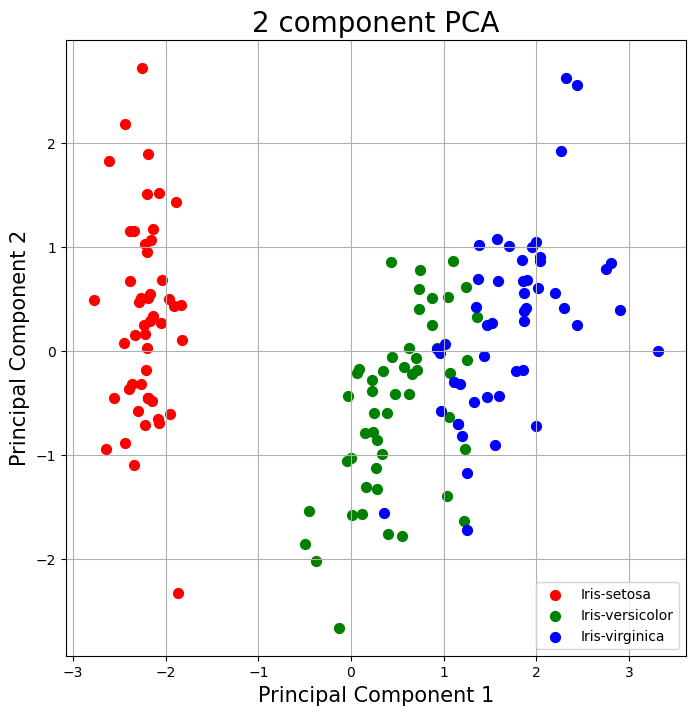

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

# Catatan: Asumsi bahwa 'df_standar' dan variabel lain telah didefinisikan sebelumnya,
# serta PCA diimpor dari sklearn.decomposition (ini adalah impor yang umum
# meskipun tidak terlihat di gambar).

# Inisialisasi PCA dengan 2 komponen
pca = PCA(n_components = 2)

# Fit dan transform data (asumsi df_standar adalah data standar)
pca.fit(df_standar)
data_pca = pca.transform(df_standar)

# Konversi hasil PCA kembali ke DataFrame
data_pca = pd.DataFrame(data_pca, columns=['PC1','PC2'])
# #data_pca.head() # Baris ini dikomentari

# Gabungkan hasil PCA dengan kolom target (asumsi df memiliki kolom 'Species')
finalDf = pd.concat([data_pca, df[['Species']]], axis = 1)

# Persiapan plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

# Definisi target dan warna
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

# Plotting setiap grup target
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
             , finalDf.loc[indicesToKeep, 'PC2']
             , c = color
             , s = 50)

# Tambahkan legenda dan grid
ax.legend(targets)
ax.grid()

# Tampilkan plot (perintah ini diasumsikan ada setelah kode yang terlihat)
# plt.show()

# Cetak rasio varians yang dijelaskan
print(pca.explained_variance_ratio_)
# Output yang terlihat: [0.72770452 0.23030523] 95.7%

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# 1. Load dataset Iris
# df = pd.read_csv('../data/iris/iris.csv', sep=',')
iris = load_iris()

# Separating out the features
# X = df.loc[:, features].values
X = iris.data

# Separating out the target
# y = df.loc[:, ['Species']].values
y = iris.target

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
# 3. Standardisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit + transform
X_test_scaled = scaler.transform(X_test)      # hanya transform

# 4. PCA - ambil 2 komponen utama
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 5. SVM model (RBF kernel)
svm_model = SVC(kernel='rbf', gamma='scale')
svm_model.fit(X_train_pca, y_train)

# 6. Prediksi
y_pred = svm_model.predict(X_test_pca)

# 7. Akurasi
acc = accuracy_score(y_test, y_pred) * 100.0
print(f"Akurasi SVM dengan PCA: {acc:.1f}%")

# Output yang terlihat:
# Akurasi SVM dengan PCA: 90.0%

Akurasi SVM dengan PCA: 90.0%
